In [1]:
import pandas as pd

In [2]:
url = 'E:\GitHub репозитории\Data-Science-course-by-miracl6\CSV\\boston.csv'

In [3]:
boston = pd.read_csv(url)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.columns.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [5]:
# переименовываем целевую колонку
boston.rename(columns={'MEDV': 'target'}, inplace=True)
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [6]:
# стандартизируем каждый из признаков - разницу конкретного значения
# со средним делим на среднее выборочное отклонение

from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sns.set(rc={'figure.figsize': (9, 6)})

## Масшатбирование признаков

### Стандартизация

In [8]:
# создаём экземпляр класса StendardScaler
sc = StandardScaler()

# [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [9]:
df_scalar = sc.fit_transform(boston.iloc[:, :-1])
df_scalar  # получаем данные формата np.ndarray

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [10]:
df_scalar = pd.DataFrame(data=df_scalar, columns=boston.columns[:-1])
df_scalar  # обновленный датафрейм после Z-нормализации

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


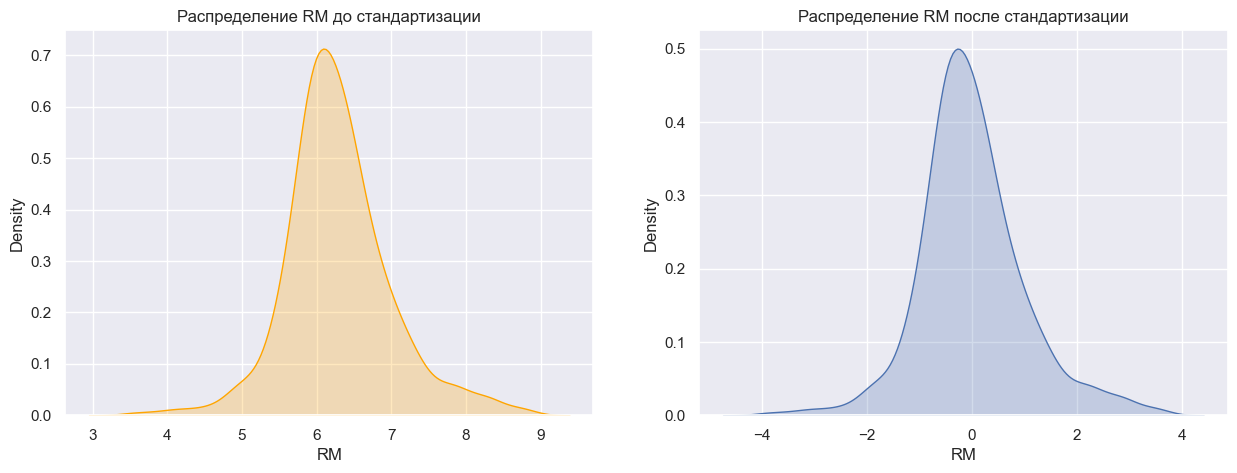

In [11]:
# в первой строке мы получаем две плоскости для рисования графика (fig)
# axes отвечает за доступ к каждой из плоскостей
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.kdeplot(data=boston, x='RM', fill=True, color='orange', ax=axes[0]);
axes[0].set_title('Распределение RM до стандартизации')
sns.kdeplot(data=df_scalar, x='RM', fill=True, ax=axes[1])
axes[1].set_title('Распределение RM после стандартизации');

# [matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

# [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

A kernel density (плотность) estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset.

y (default) = 'Density'

# [matplotlib.axes.Axes.set_title](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html)

Разброс значений будет от 0 до 1. Полезно, когда распределение значений ненормальное.

### Нормирование

In [12]:
from sklearn.preprocessing import MinMaxScaler

# создаем экземпляр класса MinMaxScaler
mm = MinMaxScaler()
df_scaler = mm.fit_transform(boston.iloc[:, :-1])
# преобразуем в датафрейм np-массив
df_scaler = pd.DataFrame(data=df_scaler, columns=boston.columns[:-1])
df_scalar[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


# [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

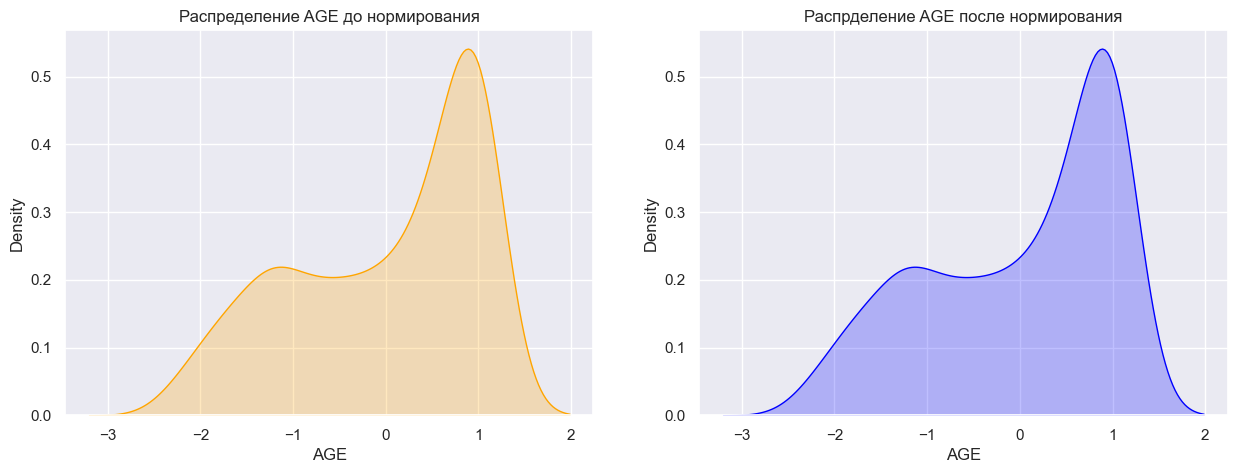

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.kdeplot(data=df_scalar, x='AGE', fill=True, color='orange', ax=axes[0])
axes[0].set_title('Распределение AGE до нормирования')
sns.kdeplot(data=df_scalar, x='AGE', fill=True, color='blue', ax=axes[1])
axes[1].set_title('Распрделение AGE после нормирования');

Наши значения теперь распределились в промежутке от 0 до 1

## Обработка признаков

### Кодирование категориальных признаков

In [14]:
# создадим искусственый столбец с номинативными значениями
import numpy as np

wall_color = ['white', 'green', 'blue']
boston['wall_color'] = [np.random.choice(wall_color) for _ in range(len(boston))]
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,wall_color
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,white
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,white
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,green
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,white
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9,blue


# [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

In [15]:
pd.get_dummies(data=boston, prefix='wall_color', drop_first=True).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,wall_color_green,wall_color_white
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1,0


# [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [16]:
boston['wall_color'] = boston['wall_color'].astype('category')
boston['wall_color'].cat.codes

0      2
1      0
2      1
3      0
4      1
      ..
501    2
502    2
503    1
504    2
505    0
Length: 506, dtype: int8

# [pandas.DataFrame.astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)

# [pandas.Series.cat.codes](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.codes.html)

## Сэмплирование выборки на train и test (задача регрессии)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
boston = pd.read_csv('E:\GitHub репозитории\Data-Science-course-by-miracl6\CSV\\boston.csv')
# переименовываем целевую колонку
boston.rename(columns={'MEDV': 'target'}, inplace=True)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [19]:
# размечаем данные
X = boston.iloc[:, :-1]
y = boston.target

In [20]:
# сплитаем столбец с данными на тестовую и трейновую выборки
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [21]:
print(f'boston size is {boston.shape}')
print(f'X_train size is {X_train.shape}')
print(f'X_test size is {X_test.shape}')

boston size is (506, 14)
X_train size is (404, 13)
X_test size is (102, 13)


## Сэмплирование выборки на train и test (задача классификации)

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# импортируем датасет с ирисами
iris = load_iris()

# разбиваем на выборку и таргет
X = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
y = iris['target']

In [23]:
X.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [24]:
y  # numpy.ndarray type

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

stratify=y, так как он применим, если решаете задачу классификации

In [26]:
print(f'iris size is {pd.concat([X, pd.Series(y)], axis=1).shape}')
print(f'X_train size is {X_train.shape}')
print(f'X_test size is {X_test.shape}')

iris size is (150, 5)
X_train size is (120, 4)
X_test size is (30, 4)


# [pandas.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

## Обработка признаков

In [27]:
# Стандартизация тренировочных и тестовых данных
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

# Нормирование тренировочных и тестовых данных
mm = MinMaxScaler()
X_train_std = mm.fit_transform(X_train)
X_test_std = mm.transform(X_test)

# [pandas.DataFrame.transform](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html)

а там прикол в том, чтоб ликов таких не было. Вы по сути не знаете, что должно быть в тесте, поэтому обучаете скалер на трейне и применете на тесте (Анастасия PyMagic)

###### Лик - это некий проброс или связь между тестовым и тренировочным набором данных. Для корректной проверки модели следует максимально этого избегать. Исключением являются соревнования (например Kaggle) там наоборот поиск лика может дать отличный прирост в точности модели

Некорректно выполнять стандартизацию перед разделением данных, иначе вы подгоняете обработчик данных ко всему набору. Необходимо обучать обработчик данных на train наборе и использовать его уже как и для train, так и для test наборов.

Test набор используется для получения оценки производительности модели на "невидимых данных". Таким образом мы можем действительно корректно оценить нашу модель без "подсказок". 

# Задача 1

Вам уже дан датасет df, который содержит в себе 3 колонки:

feature_1 - первый признак
feature_2 - второй признак
target - целевая переменная y (вещественные числа)


1) Разбейте данные на тренировочный и тестовые для задачи регрессии (как рассматривали ранее), установите при разбиении параметры random_state=10 и test_size=0.2, записав полученные результаты в соответствующие переменные:

X_train - тренировочные данные на основании df, содержащие признаки feature_1 и feature_2 (должен быть тип pd.DataFrame) 

X_test - тестовые данные на основании df, содержащие признаки feature_1 и feature_2 (должен быть тип pd.DataFrame) 

y_train - тренировочные данные на основании df, содержащие целевую переменную target

y_test- тестовые данные на основании df, содержащие целевую переменную target

2) Стандартизируйте тренировочные и тестовые данные. Использовать X_train и X_test, записав результат соответственно в переменные X_train_std и X_test_std

```Python
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
```

# Задача 2

Вам уже дан датасет df, который содержит в себе 3 колонки:

feature_1 - первый признак
feature_2 - второй признак
target - целевая переменная y (метки класса 0 или 1)


1) Разбейте данные на тренировочный и тестовые для задачи классификации (как рассматривали ранее), установите при разбиении параметры stratify=y (где y - это целевая переменная из датасета df), random_state=10 и test_size=0.2, записав полученные результаты в соответствующие переменные:

X_train - тренировочные данные на основании df, содержащие признаки feature_1 и feature_2 (должен быть тип pd.DataFrame) 

X_test - тестовые данные на основании df, содержащие признаки feature_1 и feature_2 (должен быть тип pd.DataFrame) 

y_train - тренировочные данные на основании df, содержащие целевую переменную target

y_test- тестовые данные на основании df, содержащие целевую переменную target

2) Нормируйте тренировочные и тестовые данные. Использовать X_train и X_test, записав результат соответственно в переменные X_train_std и X_test_std

```Python
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=10)

mm = MinMaxScaler()
X_train_std = mm.fit_transform(X_train)
X_test_std = mm.transform(X_test)
```